<a href="https://colab.research.google.com/github/yjodev/Tobigs19/blob/main/wk2_optimization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
from google.colab import drive  # Google Drive에 마운트한다. 
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/My Drive/투빅스/과제/W2_Optimization/assignment_2.csv'

#pandas read_csv로 불러오기
data = pd.read_csv(filename)
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [ ]:
data.keys() # Column에 Label, bias, experience, salary가 있다.

Index(['Label', 'bias', 'experience', 'salary'], dtype='object')

In [ ]:
data.info() # pandas Dataframe 형식이다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Label       200 non-null    int64  
 1   bias        200 non-null    int64  
 2   experience  200 non-null    float64
 3   salary      200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


## 경사하강법이란?
- 딥러닝 알고리즘 학습시 사용되는 최적화 방법 중 하나

## 최적화란?
- 딥러닝 알고리즘 학습의 목표는 예측값과 실제값 사이의 차이인 손실함수를 최소화하는 파라미터(모수)를 찾는 것.
- 학습 데이터는 변경할 수 없으므로, 손실함수 값의 변화에 따라 가중치(weight) 또는 편향(bias)을 업데이트 해야 한다.
  - Y = wx + b (데이터의 칼럼 하나인 경우)
  - Y = w1x1 + w2X2 + b (데이터의 칼럼 두개인 경우
  - 데이터: X , 라벨: Y, 모수: W(가중치), b(편향)
  - 최적의 가중치와 편향을 찾는 방법 중 하나가 경사하강법임.

- 최적화를 위해 일계조건(f'(x*)=0)과 이계조건(f''(x*)>0이면 최대값, f''(x*)<0이면 최소값) 을 확인하는 방법을 사용해도 되지만, 이는 다음과 같은 한계가 있음.
  - 목적함수가 항상 미분 가능한 것은 아님
  - Saddle Point(말안장점): 미분해서 0이 된다고 무조건 최적점이 아닐 수 있음

- 따라서 iterative approach, 즉 반복적인 접근을 통해서 미분해서 0이 되는 지점을 approximate 하는 방법 사용한다. (ex: Gradient Descent)

## 경사하강법(Gradient Descent)
- 시작점에서 경사가 가장 가파른 방향으로 이동하여 최소점을 찾는 방법이 경사하강법이다. 
- 일차 미분을 이용한 최적화 기법이다.
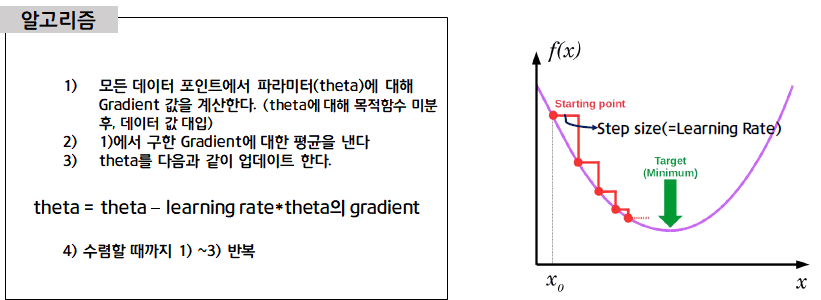


(좌) Batch Gradient Descent 알고리즘 (우) 2차 포물선 함수에서의 경사하강법


# 2차 포물선에서의 경사하강법  설명
- 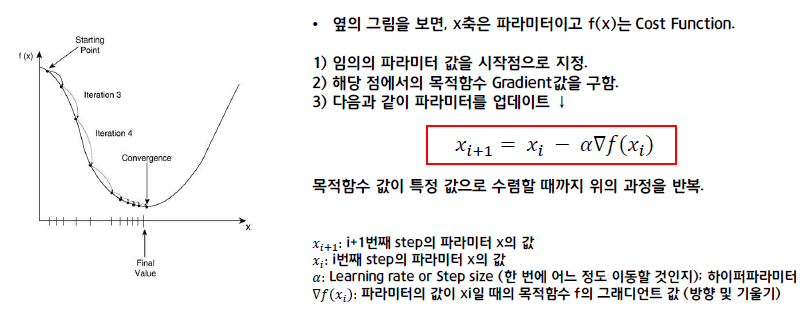

- 임의의 가중치(모수) Wn-1를 선정한다. 목적 함수인 손실함수를 비용 w에 대해 편미분하고, 이를 학습률(learning rate)와 곱한 값을 앞서 선정한 임의의 가중치 Wn-1에서 빼준다.


# Gradient
- 다변수함수 f(x1,...,xn)에 대한 gradient는 함수를 구성하는 각 변수에 대한 일차 편미분값으로 구성되는 벡터이다.
- 이 벡터는 f의 값이 가장 가파르게 증가하는 방향을 나타내며, 벡터의 크기는 그 증가의 가파른 정도(기울기)를 나타낸다. 
- Gradient가 양의 값을 갖는다면 현재 파라미터를 가정한 목적함수가 증가하고 있다는 의미이므로, 파라미터를 더 작은 쪽으로 움직여야 한다. (2차함수로 예를 들면 기울기가 양수이면 x*값을 왼쪽으로 변경해야 최적화(최소화)됨)
- 반대로 Gradient가 음의 값을 갖는다면, parameter를 더 큰 쪽으로 움직여야 한다.

# Learning Rate
- gradient에 learning rate(학습률,알파, step size)를 곱하여 현재 파라미터 값에서 빼주는 형태로 업데이트한다.  
- 학습률이 너무 크면 한 지점으로 수렴하는 것이 아니라 발산할  가능성이 존재한다.
- 학습률이 너무 작으면 수렴이 늦어진다. 
- 학습률 설정 오류에 따라 global Minima가 아니라 Local Minima로 수렴할 수도 있다. 


## Train Test 데이터 나누기

머신러닝 모델을 학습하고 그 결과를 검증하기 위해서는 원래의 데이터를 Training, Validation, Testing의 용도로 나누어 다뤄야 한다. 그렇지 않고 Training에 사용한 데이터를 검증용으로 사용하면 시험문제를 알고 있는 상태에서 공부를 하고 그 지식을 바탕으로 시험을 치루는 꼴이므로 제대로 된 검증이 이루어지지 않기 때문이다. 

​

딥러닝을 제외하고도 다양한 기계학습과 데이터 분석 툴을 제공하는 scikit-learn 패키지 중 model_selection에는 데이터 분할을 위한 train_test_split 함수가 들어있다.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [ ]:
# train_test_split(data arrays, label arrays, test_size, train_size, random_state, shuffle, stratify)
# train_test_split의 첫 번째 Parameter: data arrays
# 분할시킬 데이터를 입력. Python list, Numpy Array, Pandas dataframe 등 
data.iloc[:,1:] # data의 전체 행, 1번째 이후의 열 

,bias,experience,salary
0,1,0.7,48000
1,1,1.9,48000
2,1,2.5,60000
3,1,4.2,63000
4,1,6.0,76000
...,...,...,...
195,1,6.5,84000
196,1,6.9,73000
197,1,5.1,72000
198,1,9.1,69000


In [ ]:
# train_test_split의 두 번째 parameter: Label arrays (Y값)
# label array 없이 data array만 넣을 수도 있다. 
# 그럼 train_test_split 함수의 return값이 X_train과 X_test만 나옴.
data.iloc[:, 0] # data의 전체 열, 0번째 column

0      1
1      0
2      1
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: Label, Length: 200, dtype: int64

In [ ]:
# train_test_split의 세 번째 parameter: test_size = 0.25
# 테스트 데이터셋의 비율(float)이나 갯수(int)
# train_size = 1 - test_size = 0.75
# 학습 데이터셋의 비율(float)이나 갯수(int)

# train_test_split의 네 번째 parameter: random_state = 0
# 데이터 분할시 셔플이 이루어지는데, 이를 위한 시드값(int)

In [46]:
# Return
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# train 데이터와 test 데이터가 0.25:0.75의 비율로 split되었다.
# X값은 데이터 array, Y값은 레이블  array

((150, 3), (50, 3), (150,), (50,))

In [49]:
X_train.head()

,bias,experience,salary
71,1,5.3,48000
124,1,8.1,66000
184,1,3.9,60000
97,1,0.2,45000
149,1,1.1,66000


In [50]:
X_test.head()

,bias,experience,salary
18,1,1.0,56000
170,1,6.2,70000
107,1,3.9,74000
98,1,8.6,95000
177,1,2.0,54000


In [51]:
y_train.head()

71     1
124    1
184    1
97     0
149    0
Name: Label, dtype: int64

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 평균 0, 분산 1로 조정
bias_train = X_train["bias"] # train data의 bias열 선택
bias_train = bias_train.reset_index()["bias"] # train data의 bias 열의 index 정렬
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
# X_train data를 scaled 된 data로 저장. 기존 column명 사용
X_train["bias"] = bias_train # bias열은 index정렬한 값 
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


In [15]:
X_train["bias"]

0      1
1      1
2      1
3      1
4      1
      ..
145    1
146    1
147    1
148    1
149    1
Name: bias, Length: 150, dtype: int64

In [9]:
X_train["bias"].reset_index()["bias"]

0      1
1      1
2      1
3      1
4      1
      ..
145    1
146    1
147    1
148    1
149    1
Name: bias, Length: 150, dtype: int64

In [14]:
scaler.fit_transform(X_train) # (150,3) array 형태
# bias column의 모든 값이 1이었기 때문에 0을 평균으로 갖게 scaling하면 모두 0이 됨.
# 기존의 bias 값으로 대체해주기 
# 결과적으로 experience, salary 열만 scaled 됨.

array([[ 0.        ,  0.18789304, -1.14333496],
       [ 0.        ,  1.1855552 ,  0.04397442],
       [ 0.        , -0.31093804, -0.35179537],
       [ 0.        , -1.62927733, -1.34121985],
       [ 0.        , -1.3086002 ,  0.04397442],
       [ 0.        ,  1.6131247 ,  1.62705359],
       [ 0.        ,  1.79127866,  2.74840134],
       [ 0.        ,  0.00973908, -0.417757  ],
       [ 0.        ,  0.93613966,  0.76955237],
       [ 0.        , -1.3086002 , -2.13275944],
       [ 0.        ,  0.93613966,  0.30782095],
       [ 0.        ,  1.86254024,  0.43974421],
       [ 0.        , -0.63161517, -0.35179537],
       [ 0.        ,  0.43730858,  0.10993605],
       [ 0.        , -0.52472279, -1.01141169],
       [ 0.        ,  0.366047  ,  0.24185932],
       [ 0.        ,  0.33041621,  0.37378258],
       [ 0.        ,  0.54420096, -0.15391047],
       [ 0.        ,  0.43730858, -0.87948843],
       [ 0.        , -1.66490812, -1.27525822],
       [ 0.        , -0.38219962, -0.087

이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

# 데이터 전처리 
- fit(): 훈련하다, 머신러닝이 데이터에 머신러닝 모델을 맞추는 것
  - 학습 데이터 세트에서 변환을 위한 기반 설정을 하는 함수
  - 데이터를 학습시키는 메서드

- transform(): fit을 기준으로 얻은 mean, variance에 맞춰서 변형하는 것
  - fit을 통해 세운 기반으로 변형하는 함수
  - 실제로 학습시킨 것을 적용하는 메서드

- fit_transform(): fit + transform

# 왜 train dataset에서만 fit_transform 을 하고 test dataset에서는 transform만 할까? 
- test set에도 fit을 해버리면 scalar가 기존 학습 데이터에 fit한 기준을 다 무시하고 테스트 데이터에 새로운 mean, variance값을 얻으면서 테스트 데이터까지 학습해버린다.
- 테스트 데이터는 검증을 위해 남겨둔 셋이기 때문에 fit하지 않음

In [53]:
# X_train data의 전처리 과정과 동일하다. 
# scaling시 fit_transform이 아니라 transform만 한다.
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [54]:
# parameter 개수 = 열의 개수
N = len(X_train.loc[0]) # 첫번째 행의 길이 
N

3

In [55]:
# 초기 parameter들을 임의로 설정해줍니다.
# 각각의 열(biase, experience, salary)이 얼마나 영향을 주는가?
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.38144078, 0.85620861, 0.41673773])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [56]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)): # 3번 반복
        z += X[i] * parameters[i]
    return z

In [57]:
len(parameters)

3

## Logistic Function

## $p = \frac{1}{1+exp(-X_i \theta)}$

# 로지스틱 회귀
- 여러 조건을 부합하여 결과를 0(사건이 발생하지 않음)과 1(사건이 발생함)으로 출력하는 역할을 수행
- 시그모이드 함수
- 단순히 선형회귀 모델을 사용하지 않고 시그모이드 함수를 사용해야 하는 이유는 사건이 발생하고, 발생하지 않는 이유를 선형으로 표현할 때 문제점이 발생하기 때문
- 기존의 선형회귀보다 분류 문제에서 보다 유용하게 사용 가능

In [58]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p = 1/(1+np.exp(-z))
    return p

In [59]:
logistic(X_train.iloc[1], parameters)

0.8045296556217746

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma(y_i\log(p(X_i))+(1-y_i)\log(1-p(X_i)))$ 

In [60]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = -(y*np.log(p) + (1-y)*np.log(1-p))
    return loss

In [61]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X,parameters.T)
    loss = ((y-y_hat)**2) /2
    return loss

In [62]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [63]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.1222766542854137

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= -\sum(y_i-\theta^T X_i)X_ij$ 
## ${\partial\over{\partial \theta_j}}l(p)=-\sum(y_i-p_i)X_ij$ 

In [64]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X,parameters.T)
        gradient = (y-y_hat) * X[j]
    else: # logistic 함수인 경우
        p = logistic(X,parameters)
        gradient = (y-p) * X[j]
    return -gradient

In [65]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.09085465474583236

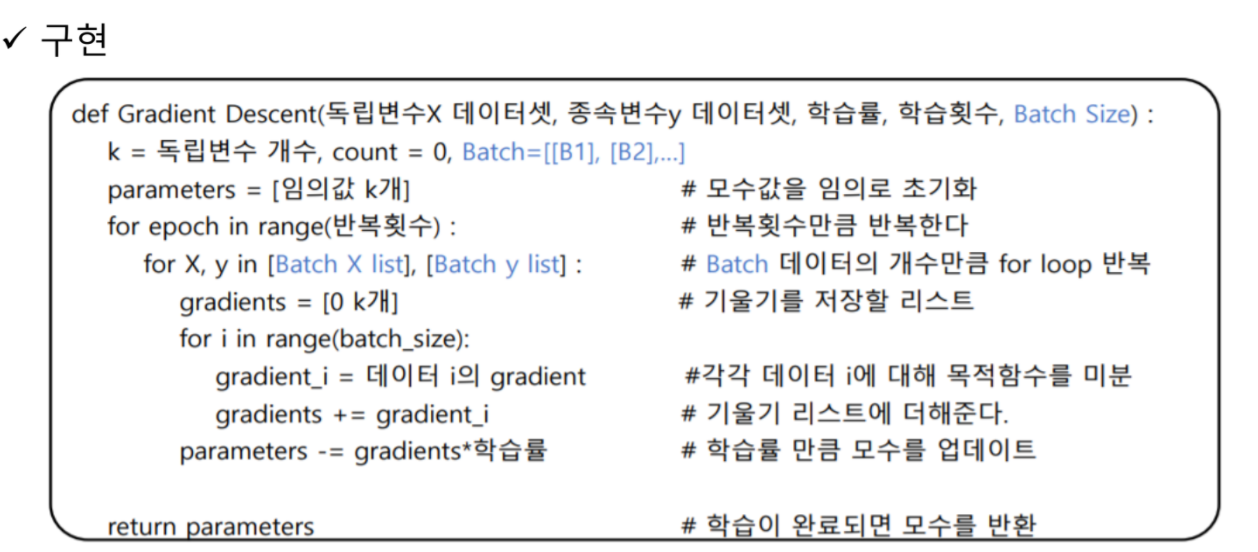

In [ ]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [66]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)

    
    return gradients

In [67]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1


[43.21881996195448, 16.961633927038655, 44.94380790128538]

## mini-batch
인덱스로 미니 배치 나누기

In [68]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 
X_train 데이터의 크기를 N이라고 하자.
이 때 배치의 개수는 (N//batch_size)+1이다.
배치의 개수만큼 모수가 업데이트되어 변경된다.
하나의 미니배치는 parameter를 한 번 업데이트 할 때 사용되는 데이터이다. 
따라서, batch_idx 함수의 return값이 미니배치이다. 

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [69]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
    
    parameters -= gradients
    return parameters

In [71]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.37855953, 0.85507783, 0.41374148])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 전체 데이터셋이 한 번 학습되는 것
- num_epoch: 학습할 총 epoch 수
<br>

-BGD: 한 번 업데이트할 때 모든 데이터셋 사용
-SGD: 한 번 업데이트할 때 하나의 데이터셋 사용
-MGD: 한 번 업데이트할 때 k개의 데이터셋 사용
<br>
-batch_size에 따른 경사하강법의 종류를 적어주세요  
  -batch_size=1 -> SGD
  -batch_size=k -> MGD  
  -batch_size=whole -> BGD  

In [72]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i  if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
     
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [73]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.868404667395234  params: [0.48519011 0.72992416 0.28188243]  gradients: [0.032201910164173536, 0.00783787319991811, 0.02666789506121291]
epoch: 100  loss: 0.4389924272597103  params: [-0.82629799  0.99432029 -0.90347933]  gradients: [0.0040295493717733555, -0.005544358266695543, 0.006054216457939732]
epoch: 200  loss: 0.3850406741276705  params: [-1.04977196  1.48213912 -1.3962255 ]  gradients: [0.0013328853059373866, -0.004206555327537866, 0.004118224501831774]
epoch: 300  loss: 0.3576284472178521  params: [-1.15480538  1.84866233 -1.75303242]  gradients: [0.0008718080071857968, -0.0032070914053923504, 0.0031085011222449247]
epoch: 400  loss: 0.3412160848164644  params: [-1.23241111  2.13411604 -2.02885683]  gradients: [0.0006996623569800361, -0.002551438612320752, 0.0024578253288524195]
epoch: 500  loss: 0.33052795222854625  params: [-1.29655757  2.36500582 -2.2507006 ]  gradients: [0.0005902174180565955, -0.0020963281621691147, 0.002009051449307254]
epoch: 600  los

array([-1.50796564,  3.09013349, -2.93995681])

In [74]:
new_param_sgd = gradient_descent(X_train, y_train)
new_param_sgd

epoch: 0  loss: 0.9776617126971582  params: [ 0.1590528   0.8907494  -0.23876023]  gradients: [0.05205939894026992, 0.049207874332517935, 0.06154105024905496]
epoch: 100  loss: 0.1957620524637462  params: [-1.57702304  3.12131082 -3.06628606]  gradients: [0.007366009377833163, 0.010883371174521988, 0.014397382339960432]
epoch: 200  loss: 0.1672814360209723  params: [-1.78015259  3.76684295 -3.67529574]  gradients: [0.006962538942399071, 0.010553377054190167, 0.013031282515257744]
epoch: 300  loss: 0.15688002389378142  params: [-1.87149737  4.0524747  -3.94253544]  gradients: [0.00685192634704961, 0.010440977738305244, 0.012537535983892156]
epoch: 400  loss: 0.15206894207171848  params: [-1.91786263  4.1966798  -4.0769577 ]  gradients: [0.00680790285887469, 0.0103905975392088, 0.012310219495321831]
epoch: 500  loss: 0.14961709527612674  params: [-1.94263328  4.27353529 -4.14846636]  gradients: [0.006787223849139043, 0.01036530500851, 0.012194632584064542]
epoch: 600  loss: 0.14830743366

array([-1.97162529,  4.36333652, -4.23190492])

In [75]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 1)
new_param_mgd

epoch: 0  loss: 0.28349195586081116  params: [-0.85333523  1.06694222 -1.19781975]  gradients: [0.025545595456997746, 0.013901937481245014, 0.017973644457045523]
epoch: 100  loss: 0.07736672553361536  params: [-1.93032556  4.17501915 -4.06769081]  gradients: [0.007538544441360125, 0.004102483095365367, 0.005304050075510273]
epoch: 200  loss: 0.0773626655225293  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [0.007538159521898584, 0.004102273621826234, 0.005303779249740797]
epoch: 300  loss: 0.07736266518361727  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.0075381594897671435, 0.004102273604340272, 0.005303779227133413]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [0.007538159489764571, 0.004102273604338872, 0.005303779227131603]
epoch: 600  loss: 

array([-1.9303681 ,  4.17514311, -4.06780375])

### Predict Label

In [76]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [77]:
from sklearn.metrics import *

In [78]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [79]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [80]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [81]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [82]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.89930383, 2.22401369])

In [83]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.7847288574776705  params: [1.26961585 1.19039513]  gradients: [-0.09103576777020686, -0.018970845560582577]
epoch: 100  loss: 0.8053361261344779  params: [1.12754637 1.96056792]  gradients: [-0.07961134629634387, -0.00969569396083594]
epoch: 200  loss: 0.8055677095557363  params: [1.12714927 1.96130438]  gradients: [-0.07962977311945561, -0.009696114193578393]
epoch: 300  loss: 0.8055679700881417  params: [1.12714883 1.96130521]  gradients: [-0.07962979384671295, -0.009696114666273672]
epoch: 400  loss: 0.8055679703811994  params: [1.12714883 1.96130521]  gradients: [-0.0796297938700278, -0.009696114666805374]
epoch: 500  loss: 0.8055679703815289  params: [1.12714883 1.96130521]  gradients: [-0.07962979387005402, -0.009696114666805967]
epoch: 600  loss: 0.8055679703815289  params: [1.12714883 1.96130521]  gradients: [-0.07962979387005402, -0.009696114666805967]
epoch: 700  loss: 0.8055679703815289  params: [1.12714883 1.96130521]  gradients: [-0.07962979387005402, -0.

array([1.12714883, 1.96130521])

In [84]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

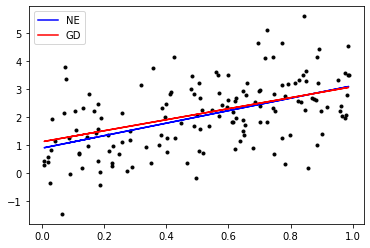

In [85]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()